<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M2.955 · Models avançats de mineria de dades</p>
<p style="margin: 0; text-align:right;">2022-2 · Màster universitari en Ciència de dades (Data science)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudis d'Informàtica, Multimèdia i Telecomunicació</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>

<div class="alert alert-block alert-info">
<strong>Nom i cognoms: XAVIER MALTAS TARRIDAS</strong>
</div>

# PAC 4: Sèries temporals i combinació de models de regressió

Aquesta activitat està dividida en dues parts:

 - **[Sèries temporals](#ej1)**: Descomposar i composar sèries temporals per fer prediccions a futur.
 - **[Combinació de classificadors](#ej2)**: Estudi de diferents mètodes de combinació de classificadors.

<u>Consideracions generals</u>: 

- La solució plantejada no pot utilitzar mètodes, funcions o paràmetres declarats **_deprecated_** en futures versions, llevat que s'indiqui explícitament.
- Aquesta PAC s'ha de fer de manera **estrictament individual**. Qualsevol indici de còpia serà penalitzat amb un suspens (D) per a totes les parts implicades i la possible avaluació negativa de l'assignatura de manera íntegra.
- Cal que l'estudiant indiqui **totes les fonts** que ha fet servir per a la realització de la PAC. Si no és així, es considerarà que l'estudiant ha comès plagi, i és penalitzat amb un suspens (D) i la possible avaluació negativa de l'assignatura de forma íntegra.
- En aquesta PAC cal utilitzar **únicament les llibreries que s'importen a continuació**. Si voleu utilitzar una altra llibreria cal consultar-ho amb el tutor/tutora de l'aula.

<u>Format del lliurament</u>:

- Alguns exercicis poden suposar diversos minuts d'execució, per la qual cosa el lliurament s'ha de fer a **format notebook** ia **format HTML**, on es vegi el codi, els resultats i comentaris de cada exercici. Es pot exportar el notebook a HTML des del menú File $\to$ Download as $\to$ HTML.
- Existeix un tipus de cel·la especial per allotjar text. Aquest tipus de cel·la us serà molt útil per respondre les diferents preguntes teòriques plantejades al llarg de lactivitat. Per canviar el tipus de cel·la a aquest tipus, al menú: Cell $\to$ Cell Type $\to$ Markdown.

Iniciem la PAC amb la càrrega de les següents llibreries:

In [2]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import ensemble
from sklearn import svm

%matplotlib inline

<a id="ej1"></a>

# 1. Sèries temporals (6 punts)

En aquest primer exercici, treballarem amb sèries temporals. Per fer-ho, farem servir el dataset **temperatura.csv** que conté la temperatura mitjana mensual de Barcelona dels darrers 15 anys, del 2008 al 2022.

Començarem llegint les dades i observant-ne gràficament la distribució. Com es pot apreciar, és un clar cas de sèrie temporal, amb heterocedasticitat, tendència, període i soroll. Al llarg daquest exercici tractarem cadascun daquests punts.

In [2]:
data = pd.read_csv("temperatura.csv", parse_dates=['Year_Month'], index_col='Year_Month', header=0)
data.head()

,Temperature
Year_Month,
2008-01-01,10.1
2008-02-01,10.2
2008-03-01,10.8
2008-04-01,13.7
2008-05-01,16.6


<AxesSubplot:xlabel='Year_Month'>

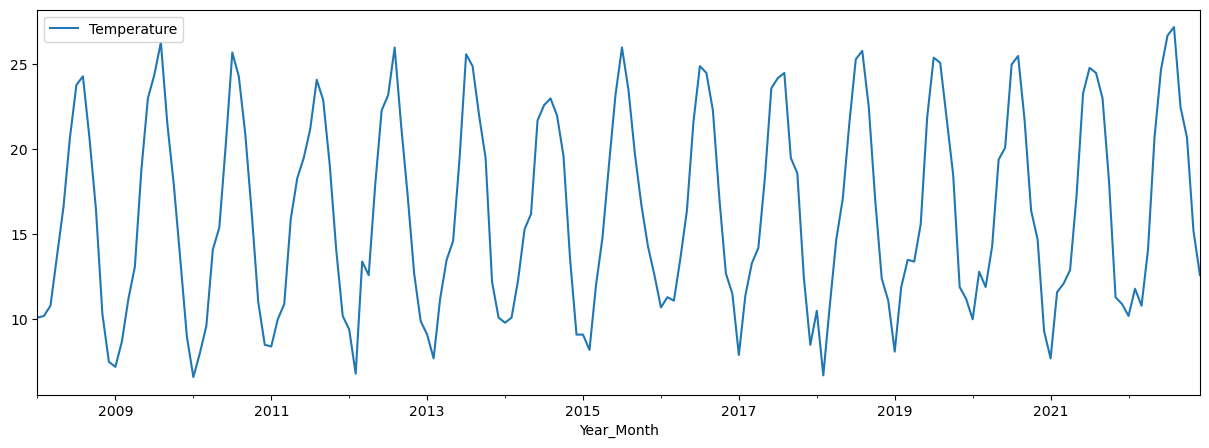

In [3]:
data.plot(figsize=(15, 5))

A continuació, separarem els darrers tres anys de dades del dataset original, les quals ens serviran com a conjunt de test. Així, quan fem una predicció de futur podrem comprovar si s'ajusta a les dades reals. La resta del conjunt de dades serà el nostre conjunt de dades d'entrenament.

In [4]:
TEST_SIZE = 36
train, test = data.iloc[:-TEST_SIZE].to_numpy(), data.iloc[-TEST_SIZE:].to_numpy()
x_train, x_test = np.arange(train.shape[0]), np.arange(train.shape[0], data.shape[0])
train.shape, x_train.shape, test.shape, x_test.shape

((144, 1), (144,), (36, 1), (36,))

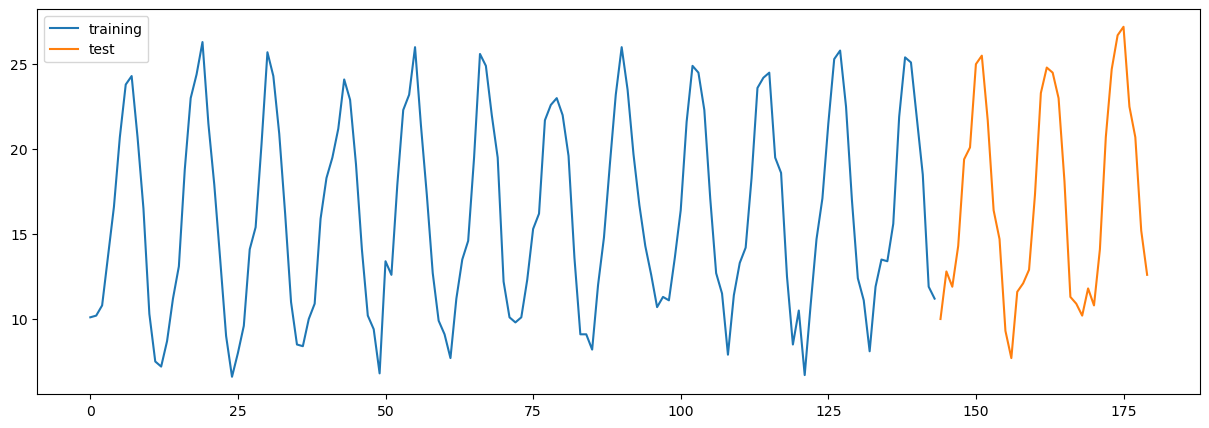

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(x_train, train, label='training')
ax.plot(x_test, test, label='test')
ax.legend()

## 1.1 Components de la sèrie temporal

### 1.1.a. Heterocedasticitat

Una sèrie temporal té heterocedasticitat quan la variància varia amb el temps (https://es.wikipedia.org/wiki/Heterocedasticidad). En el nostre cas, observem que tenim una lleu heterocedasticitat, ja que l'amplitud d'ona varia lleument amb el temps. En aquest primer apartat heu d'eliminar l'heterocedasticitat de la sèrie temporal. És a dir, que la diferència entre el mínim i el màxim de l'estacionalitat (anual) sigui més o menys la mateixa al llarg del temps.

<div class="alert alert-block alert-info">
    <strong>Implementació:</strong> transforma les <strong>dades d'entrenament</strong> per eliminar l'heterocedasticitat. Per això heu de transformar les dades aplicant la funció que considereu que elimina millor l'heterocedasticitat al dataset (exponencial, logarítmica, ...). Aquestes funcions ja estan implementades a numpy. Graficar les dades originals juntament amb les dades transformades.
</div>

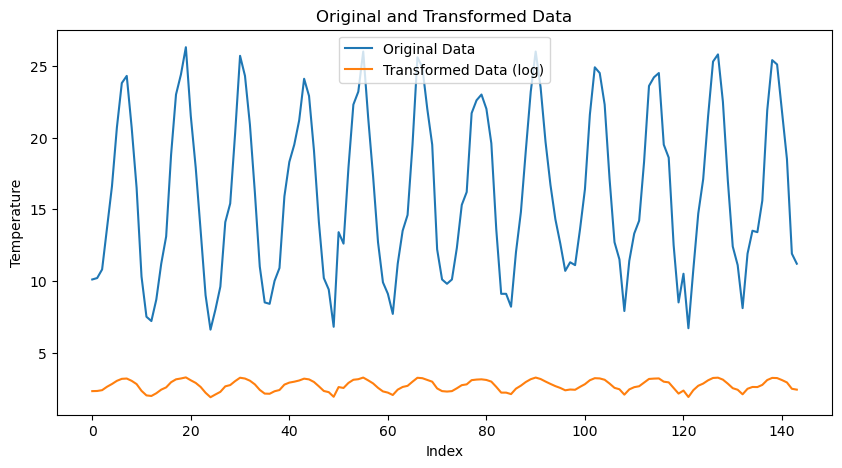

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Apply logarithmic transformation to remove heteroscedasticity
transformed_train = np.log(train)

# Plot the original and transformed data
plt.figure(figsize=(10, 5))
plt.plot(x_train, train, label='Original Data')
plt.plot(x_train, transformed_train, label='Transformed Data (log)')
plt.xlabel('Index')
plt.ylabel('Temperature')
plt.legend()
plt.title('Original and Transformed Data')
plt.show()

### 1.1.b. Tendència

La tendència és el comportament que tenen les dades a llarg termini (https://miro.medium.com/max/1872/1*rDQL2fAp_X_dgAHNZuwRfw.png). A la nostra sèrie temporal tenim una lleugera tendència lineal creixent. En aquest apartat heu d'eliminar la tendència, quedant una sèrie temporal amb tendència constant.

<div class="alert alert-block alert-info">
    <strong>Implementació:</strong> elimina la tendència de les dades transformades a la secció anterior. Observant la sèrie, podem apreciar que tenim una tendència lineal, per això podem ajustar una regressió lineal (usant scikit-learn) i sostreure-la a les dades anteriors (entrenament sense heterocedasticitat). En aquest exercici, primer hem de graficar la sèrie amb tendència juntament amb la regressió lineal i, a continuació, cal sostreure la tendència i graficar la sèrie resultant (sense tendència).
</div>

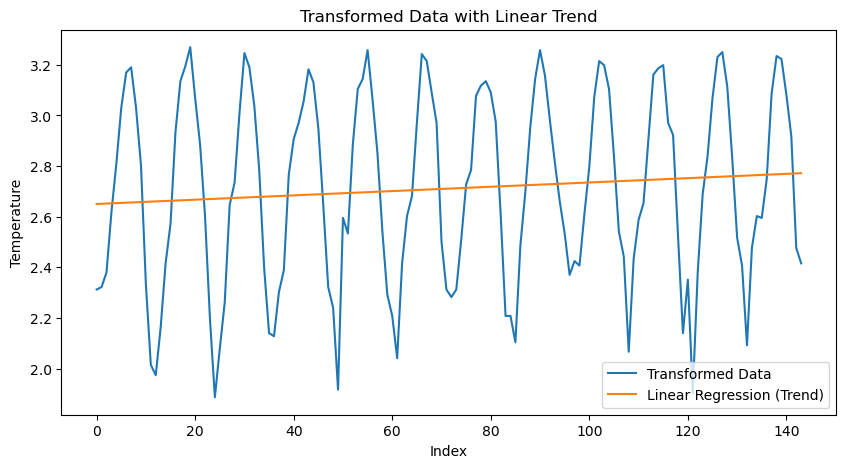

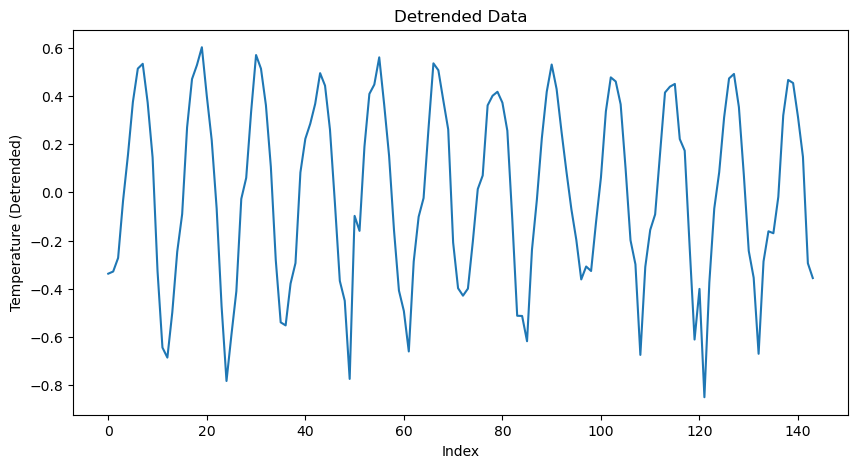

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Fit linear regression to the transformed data
regression_model = LinearRegression()
regression_model.fit(x_train.reshape(-1, 1), transformed_train)

# Predict the trend using the fitted model
trend = regression_model.predict(x_train.reshape(-1, 1))

# Plot the trended series and linear regression line
plt.figure(figsize=(10, 5))
plt.plot(x_train, transformed_train, label='Transformed Data')
plt.plot(x_train, trend, label='Linear Regression (Trend)')
plt.xlabel('Index')
plt.ylabel('Temperature')
plt.legend()
plt.title('Transformed Data with Linear Trend')
plt.show()

# Subtract the trend to obtain the detrended series
detrended_train = transformed_train - trend

# Plot the detrended series
plt.figure(figsize=(10, 5))
plt.plot(x_train, detrended_train)
plt.xlabel('Index')
plt.ylabel('Temperature (Detrended)')
plt.title('Detrended Data')
plt.show()

### 1.1.c. Estacionalitat

Definim l'estacionalitat com la variació cíclica que es produeix a les dades (https://es.wikipedia.org/wiki/Estacionalidad). En aquest apartat cal trobar i eliminar l'estacionalitat.

#### 1.1.c.a. Trobar el període de l´estacionalitat

<div class="alert alert-block alert-info">
    <strong>Implementació:</strong> en primer lloc heu de trobar el cicle, és a dir, cada quant es repeteixen les dades. Per això, podem fer servir l'autocorrelació (numpy et permet obtenir els coeficients de correlació). En aquest exercici, es demana graficar els coeficients per als 22 primers valors d'autocorrelació i determinar-ne el valor màxim, el qual serà la nostra estacionalitat. Donar una interpretació semàntica del resultat obtingut.
</div>

<strong>Nota:</strong> utilitzeu la sèrie obtinguda a l'apartat anterior (sense tendència ni heterocedasticitat).

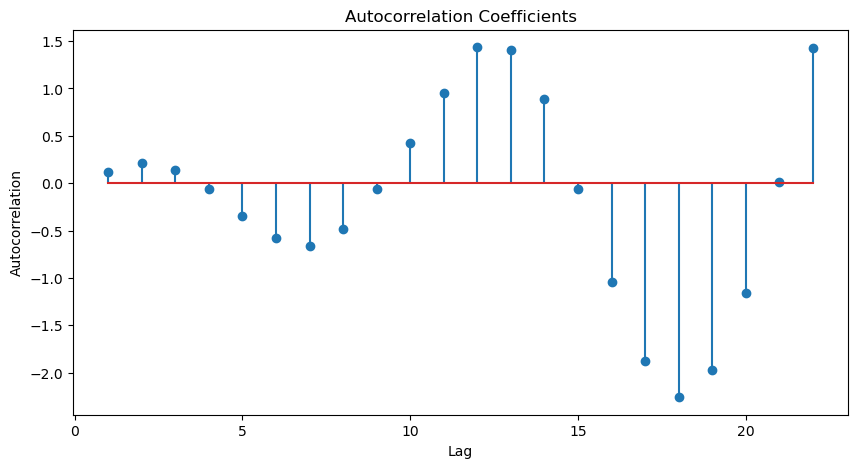

Maximum Autocorrelation: 1.4347836015966131
Corresponding Lag: 12


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Reshape detrended_train to be 1-dimensional
detrended_train_1d = detrended_train.reshape(-1)

# Calculate autocorrelation coefficients
autocorr_values = np.correlate(detrended_train_1d, detrended_train_1d, mode='full')

# Consider only the first 22 autocorrelation values
autocorr_values_22 = autocorr_values[:22]

# Plot the autocorrelation coefficients
plt.figure(figsize=(10, 5))
plt.stem(range(1, 23), autocorr_values_22)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Coefficients')
plt.show()

# Find the maximum autocorrelation value and corresponding lag
max_autocorr = np.max(autocorr_values_22)
max_lag = np.argmax(autocorr_values_22) + 1 # Adding 1 to account for 0-based indexing

print("Maximum Autocorrelation:", max_autocorr)
print("Corresponding Lag:", max_lag)

El factor 'Corresponding Lag' pren un valor a 12, suggerint d'aquesta manera que hi ha un patró estacional o estacionalitat en les dades que es repeteix aproximadament cada 12 observacions, és a dir, cada any. Mitjançant l'indicador del retard o estacionalitat, obtenim informació sobre el comportament periòdic de les dades, permetent prendre decisions o prediccions basades en els patrons recurrents.

#### 1.1.c.b. Calculeu el patró d'estacionalitat

<div class="alert alert-block alert-info">
    <strong>Implementació:</strong> ara que ja coneixeu el cicle, heu de calcular el patró (el motlle de l'estacionalitat). És a dir, per a cada punt del cicle, calculeu la mitjana d'aquest punt en cadascun dels cicles de la sèrie.
</div>

<strong>Nota:</strong> utilitzeu la sèrie obtinguda a l'apartat anterior (sense tendència ni heterocedasticitat).

In [9]:
import numpy as np
import pandas as pd

# Determine the length of each cycle based on the lag value obtained earlier
cycle_length = max_lag
print("Cycle length:", cycle_length)

# Calculate the number of complete cycles in the series
num_cycles = len(detrended_train_1d) // cycle_length
print("Nº completed cycles:", cycle_length)

# Reshape the detrended series into a matrix of cycles
cycle_matrix = detrended_train_1d[:num_cycles * cycle_length].reshape(num_cycles, cycle_length)

# Calculate the mean for each point across cycles
pattern = np.mean(cycle_matrix, axis=0)

# Convert the pattern array into a pandas Series for convenience
pattern_series = pd.Series(pattern)

# Print or visualize the pattern
print("Pattern (Estacionalitat):")
print(pattern_series)

Cycle length: 12
Nº completed cycles: 12
Pattern (Estacionalitat):
0    -0.529628
1    -0.500669
2    -0.255770
3    -0.066689
4     0.121444
5     0.358596
6     0.479639
7     0.493327
8     0.350544
9     0.164906
10   -0.185470
11   -0.430232
dtype: float64


Els valors del patró de sortida representen el comportament mitjà o característica de cada punt dins d'un mateix cicle. Per exemple, a la posició 0 dins d'un cicle, el valor mitjà és aproximadament -0.529. Això vol dir que el valor mitjà al començament de cada cicle de les dades, tendeix a ser un valor més baix.
El patró proporciona informació sobre les variacions sistemàtiques o patrons recurrents dins de les dades, permetent-nos entendre el comportament mitjà en diferents moments/punts/posicions dins del cicle.

<div class="alert alert-block alert-info">
    <strong>Implementació:</strong> una vegada obtingut el patró, repliqueu-lo al llarg de tota la sèrie temporal. Quan ho hagueu calculat, heu de restar-ho de la sèrie temporal (sense tendència ni heterocedasticitat). Graficar les dades amb estacionalitat juntament amb les dades sense estacionalitat.
</div>

La variable 'detrended_train' conté les dades sense heterocedasticitat ni tendència. 
La variable 'pattern' disposa del patró o estacionalitat calculat en els passos anteriors.

Mitjançant al següent codi repliquem el patró obtingut al llarg de la sèrie temporal, i realitzem la resta del patró replicat de la sèrie que es troba sense heterocedasticitat ni tendència, obtenim les dades sense l'estacionalitat. Finalment, el codi duu a terme una comparativa gràfica de la sèrie original i la sèrie que conté estacionalitat, permetent visualitzar l'impacte del component de l'estacionalitat.
Amb aquesta gràfica, podem entendre les variacions estacionals presents en les dades mitjançant la comparació de les dades originals amb el component d'estacionalitat aïllat.

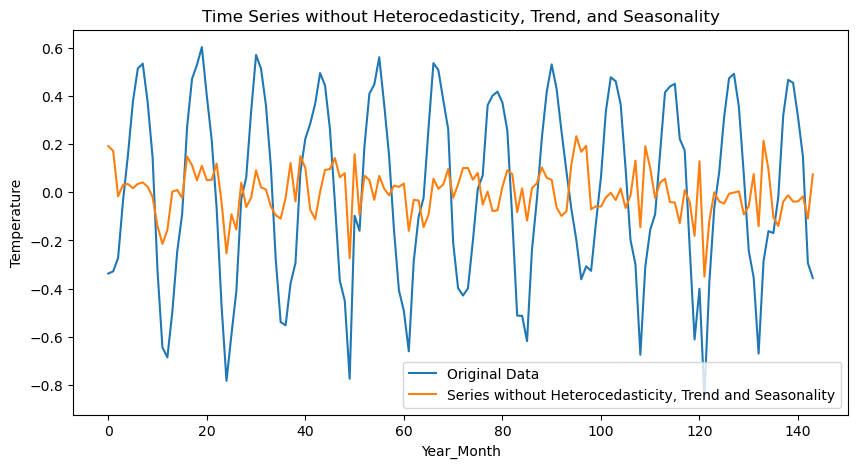

Series without Heterocedasticity, Trend, and Seasonality:
0      0.191829
1      0.171872
2     -0.016719
3      0.031200
4      0.034223
         ...   
139   -0.038983
140   -0.038008
141   -0.017360
142   -0.109067
143    0.074220
Length: 144, dtype: float64


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Replicate the pattern throughout the time series
num_cycles = len(detrended_train_1d) // len(pattern)

# Replicate the pattern for the entire length of the time series
replicated_pattern = np.tile(pattern_series, num_cycles)[:len(detrended_train_1d)]

# Subtract the replicated pattern from the detrended and deheterocedasticized series
series_without_hetero_trend_seasonality = detrended_train_1d - replicated_pattern

# Convert the series_without_hetero_trend_seasonality into a pandas Series for convenience
series_without_hetero_trend_seasonality = pd.Series(series_without_hetero_trend_seasonality)

# Plot the original time series and the seasonality data
plt.figure(figsize=(10, 5))
plt.plot(detrended_train_1d, label='Original Data')
plt.plot(series_without_hetero_trend_seasonality, label='Series without Heterocedasticity, Trend and Seasonality')
plt.xlabel('Year_Month')
plt.ylabel('Temperature')
plt.title('Time Series without Heterocedasticity, Trend, and Seasonality')
plt.legend()
plt.show()

# Print the series without heterocedasticity, trend, and seasonality
print("Series without Heterocedasticity, Trend, and Seasonality:")
print(series_without_hetero_trend_seasonality)

### 1.1.d. Soroll

Un cop eliminades l'heterocedasticitat, la tendència i l'estacionalitat, allò que ens queda és el soroll. El soroll segueix una distribució normal. En aquest apartat heu de trobar els paràmetres de la distribució que segueix el soroll (mitjana i desviació estàndard).

<div class="alert alert-block alert-info">
    <strong>Implementació:</strong> trobar la distribució que té el soroll (mitjana i desviació estàndard) usant el soroll obtingut a l'apartat anterior, és a dir, la sèrie sense heterocedasticitat, tendència i estacionalitat. Podeu fer servir scipy.stats. Finalment, grafiqueu un histograma del soroll juntament amb un histograma de la distribució teòrica que té el soroll.
</div>

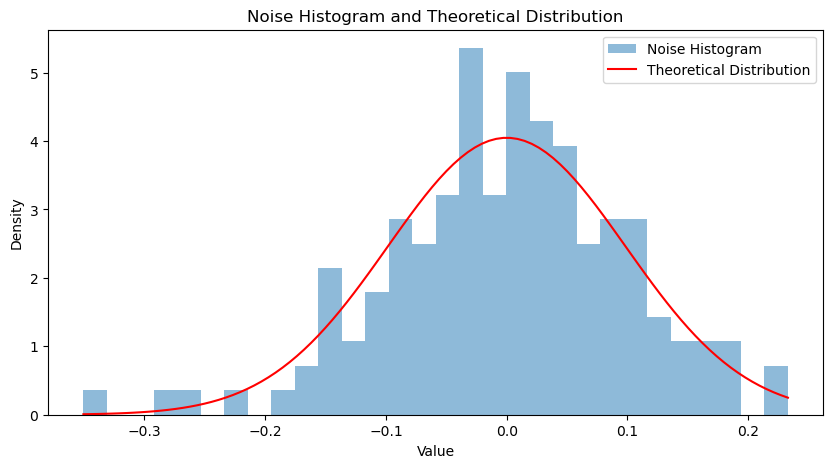

Mean: 1.5419764230904951e-18
Standard Deviation: 0.09858336138155234


In [48]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

noise_series = series_without_hetero_trend_seasonality

# Fit a normal distribution to the noise data
mean, std = stats.norm.fit(noise_series)

# Generate a range of values based on the fitted normal distribution
x = np.linspace(min(noise_series), max(noise_series), 100)
pdf = stats.norm.pdf(x, mean, std)

# Plot the histogram of the noise data
plt.figure(figsize=(10, 5))
plt.hist(noise_series, bins=30, density=True, alpha=0.5, label='Noise Histogram')

# Plot the theoretical distribution
plt.plot(x, pdf, 'r-', label='Theoretical Distribution')

plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Noise Histogram and Theoretical Distribution')
plt.legend()
plt.show()

# Print the parameters of the fitted normal distribution
print("Mean:", mean)
print("Standard Deviation:", std)

## 1.2. Predicció

Quan hem descomposat la sèrie temporal (d'entrenament), predirem els tres propers anys i compararem la predicció amb les dades reals. Per això seguirem els passos següents:

- Generar soroll
- Afegir estacionalitat
- Afegir tendència
- Afegir heterocedasticitat

### 1.2.a. Soroll

Com hem vist que el soroll es distribueix aleatòriament seguint una distribució normal, generarem soroll seguint aquesta distribució.

<div class="alert alert-block alert-info">
    <strong>Implementació:</strong> genera tres anys de dades de soroll (36 mostres) usant la distribució trobada a l'apartat 1.1.d. Podeu fer servir el mòdul random de numpy. Finalment, grafiqueu el resultat.
</div>

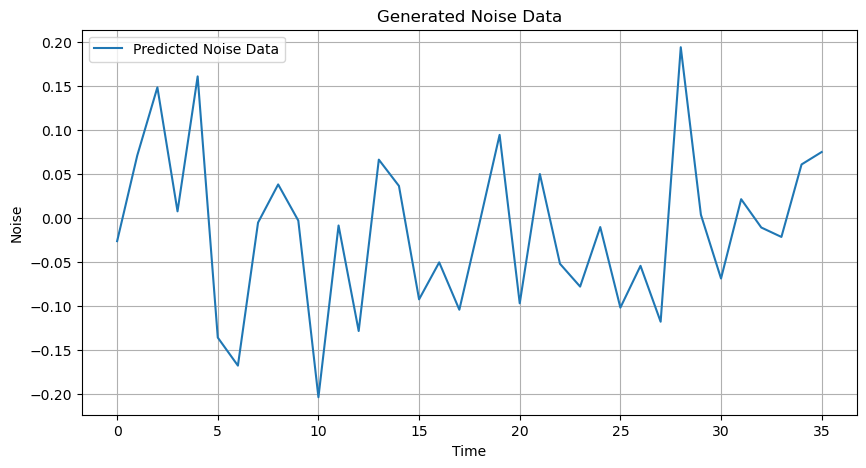

In [98]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Generate three years (36 samples) of noise data using the normal distribution
# np.random.seed(42)  # Set a seed for reproducibility - Comment if you want it to be absolutely random
generated_noise_data = np.random.normal(loc=mean, scale=std, size=36)

# Plot the predicted noise data
plt.figure(figsize=(10, 5))
plt.plot(generated_noise_data, label='Predicted Noise Data')
plt.xlabel('Time')
plt.ylabel('Noise')
plt.title('Generated Noise Data')
plt.legend()
plt.grid(True)
plt.show()

### 1.2.b. Estacionalitat

Anteriorment, hem calculat l'estacionalitat i el cicle de la sèrie temporal. Farem servir aquesta estacionalitat ja calculada per afegir-la a la nostra predicció.

<div class="alert alert-block alert-info">
    <strong>Implementació:</strong> afegeix als tres anys de soroll calculats a l'apartat anterior, l'estacionalitat trobada a l'apartat 1.1.c. Grafica el resultat.
</div>

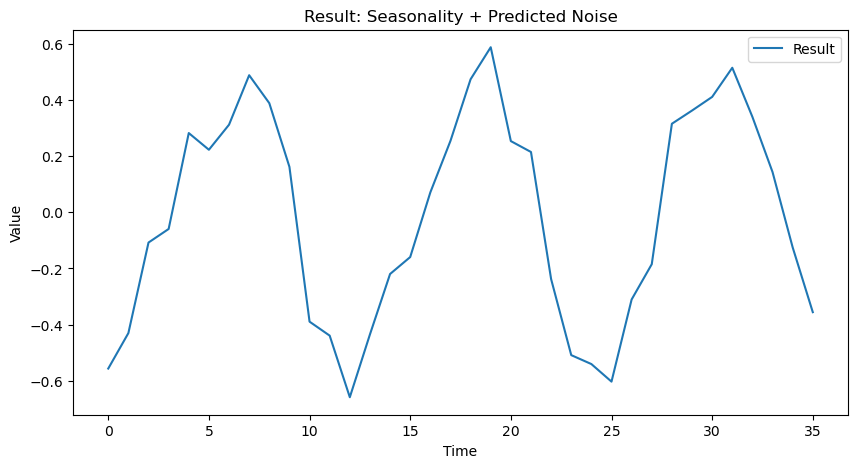

In [106]:
# Replicate the pattern throughout the length of the time series
replicated_pattern_noise = np.tile(pattern, int(len(generated_noise_data) / max_lag) + 1)[:len(generated_noise_data)]

# Add the generated noise to the replicated pattern
generated_noise_seasonality_data = replicated_pattern_noise + generated_noise_data

# Plot the result
plt.figure(figsize=(10, 5))
plt.plot(generated_noise_seasonality_data, label='Result')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Result: Seasonality + Predicted Noise')
plt.legend()
plt.show()

### 1.2.c. Tendència

A la secció 1.1.b hem vist que les dades de la sèrie temporal tenen una tendència lineal i l'hem calculada mitjançant una regressió lineal. Ara afegirem aquesta tendència a la nostra predicció.

<div class="alert alert-block alert-info">
    <strong>Implementació:</strong> afegeix als tres anys de soroll i estacionalitat calculats a l'apartat anterior, la tendència trobada a l'apartat 1.1.b. Finalment, grafiqueu la sèrie obtinguda.
</div>

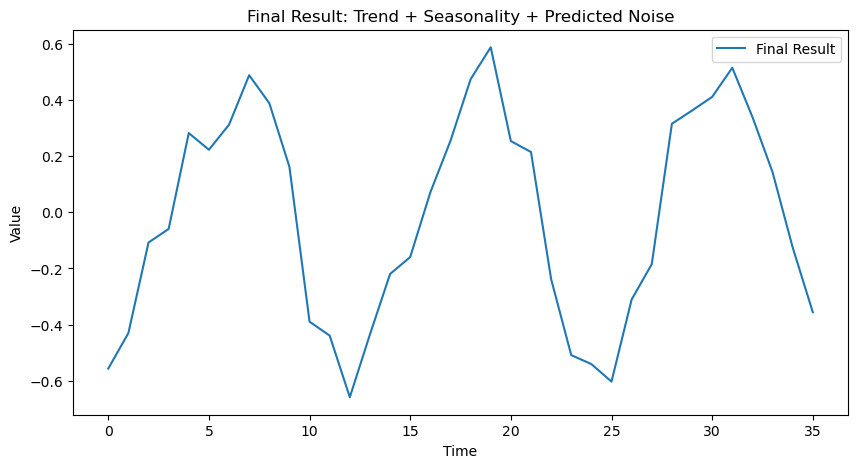

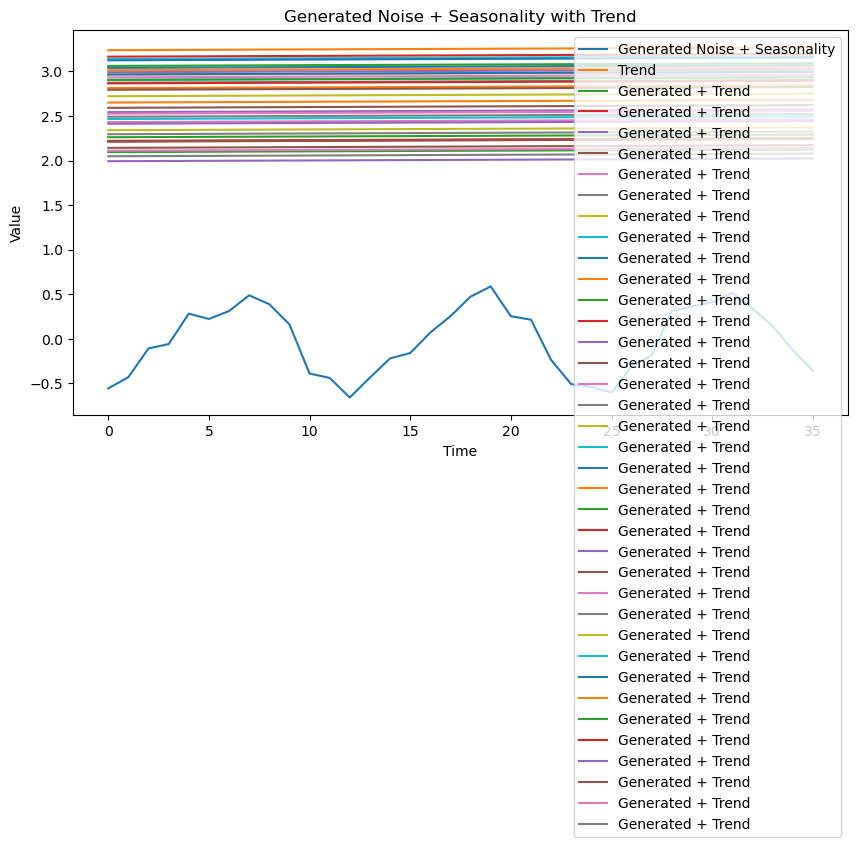

In [116]:
# Add the trend values to the result
generated_noise_seasonality_trend_data = trend.copy() + generated_noise_seasonality_data 

# Plot the final result
plt.figure(figsize=(10, 5))
plt.plot(generated_noise_seasonality_data, label='Final Result')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Final Result: Trend + Seasonality + Predicted Noise')
plt.legend()
plt.show()


# Reshape the range of indices to match the shape expected by the model
indices = np.arange(len(generated_noise_seasonality_data)).reshape(-1, 1)

# Predict the trend using the linear regression model
trend = regression_model.predict(indices).reshape(-1, 1)

# Apply the trend to the generated data
generated_noise_seasonality_trend_data = generated_noise_seasonality_data + trend

# Plot the generated noise, seasonality, and trend data with the applied trend
plt.figure(figsize=(10, 5))
plt.plot(generated_noise_seasonality_data, label='Generated Noise + Seasonality')
plt.plot(trend, label='Trend')
plt.plot(generated_noise_seasonality_trend_data, label='Generated + Trend')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Generated Noise + Seasonality with Trend')
plt.legend()
plt.show()

### 1.2.d. Heterocedasticitat

Al primer apartat d'aquesta pràctica hem vist que la sèrie temporal té heterocedasticitat i l'hem eliminat transformant les dades. En aquest apartat farem la transfromació inversa per afegir heterocedasticitat a la nostra predicció.

<div class="alert alert-block alert-info">
    <strong>Implementació:</strong> afegeix als tres anys de soroll, estacionalitat i tendència calculats a l'apartat anterior, l'heterocedasticitat, aplicant la funció inversa a la trobada a l'apartat 1.1.a. Grafica el resultat juntament amb la sèrie completa i compara la predicció obtinguda amb les dades reals.
</div>

<div class="alert alert-block alert-info">
    <strong>Anàlisi:</strong> Analitzeu els resultats obtinguts.
</div>

<a id="ej2"></a>

# 2. Combinació de classificadors (4 punts)

L'_ensemble learning_ és una estratègia en què s'utilitza un grup de models per resoldre un problema mitjançant la combinació estratègica de diversos models d'aprenentatge automàtic en un model predictiu.

En general, els mètodes d'ensemble s'utilitzen principalment per millorar la precisió del rendiment general d'un model i combinar diversos models diferents, també coneguts com a aprenents bàsics, per predir els resultats, en comptes d'utilitzar només un model.

Per què entrenem tants classificadors diferents en lloc d'un de sol? Bé, l'ús de diversos models per predir el resultat final en realitat redueix la probabilitat de sospesar les decisions preses per models deficients (sobreentrenats, no degudament ajustats...).

Com més diversos siguin aquests aprenents bàsics, més poderós serà el model final.

Tinguem en compte que en qualsevol model daprenentatge automàtic, l'error de generalització ve donat per la suma de quadrats de biaixos + variància + error irreductible.

Els errors irreductibles són una cosa que està més enllà de nosaltres! No els podem reduir.

Tot i així, utilitzant ensembles, podem reduir el biaix (bias) i la variància d'un model. Això redueix l'error de generalització general.

La <strong>compensació de biaix-variança</strong> és el punt de referència més important que diferencia un model robust d'un inferior (entenguem per inferior un model no gaire generalitzable).

Tot i que no és una regla exacta, en l'aprenentatge automàtic, els models que tenen un biaix alt tendeixen a tenir una variància més baixa i viceversa.

Hem estat parlant de biaix i variància. Vegem, però, que entenem per biaix d'un model i per variància d'un model.

1. <strong>Biaix</strong>: El biaix és un error que sorgeix degut a suposicions falses realitzades a la fase d'aprenentatge d'un model. Un biaix alt pot fer que un algoritme d'aprenentatge ometi informació important i correlacions entre les variables independents i les etiquetes de classe, per la qual cosa no sajusta al model.

2. <strong>Variança</strong>: la variància ens indica la sensibilitat d'un model als petits canvis a les dades d'entrenament. És a dir, quan canvia el model. Una gran variació en un model ho farà propens al soroll aleatori present al conjunt de dades, per la qual cosa s'ajustarà massa al model.

Per comprendre amb més detall la compensació de biaix i variància en els models d'aprenentatge automàtic, podeu consultar aquest [article](https://towardsdatascience.com/understanding-the-bias-variance-tradeoff-165e6942b229).

Un cop arribats a aquest punt, podem dividir els ensembles en quatre categories:

1. <strong>Bagging</strong>: El bagging es fa servir principalment per reduir la variació en un model. Un exemple simple de bagging és l'algorisme Random Forest.

2. <strong>Boosting</strong>: El boosting s'utilitza principalment per reduir el biaix en un model. Exemples d'algorismes són Ada-Boost, XGBoost, arbres de decisió millorats per gradient, etc.

3. <strong>Stacking</strong>: El stacking s'utilitza principalment per augmentar la precisió de predicció dun model.

4. <strong>Cascading</strong>: Aquesta classe de models són molt precisos. La connexió en cascada s'usa principalment en escenaris on no es pot permetre cometre un error. Per exemple, una tècnica en cascada es fa servir per detectar transaccions fraudulentes amb targetes de crèdit.

## Dades

Per a aquest exercici farem servir el dataset <strong>diabetes.csv</strong>. Aquest conjunt de dades és original de l'Institut Nacional de Diabetis i Malalties Digestives i Renals. L'objectiu d'aquest dataset és predir, basant-se en els mesuraments de diagnòstic, si un pacient té diabetis.

En particular, tots els pacients són dones d'almenys 21 anys d'ascendència índia Pima.

El dataset conté la següent informació:

- Embarassos: nombre d'embarassos 
- Glucosa: concentració de glucosa en plasma a 2 hores en una prova de tolerància a la glucosa oral
- Pressió arterial: pressió arterial diastòlica (mm Hg) 
- SkinThickness: Gruix del plec cutani del tríceps (mm) 
- Insulina: insulina sèrica de 2 hores (mu U/ml) 
- IMC: índex de massa corporal (pes en kg / (alçada en m) ^ 2) 
- DiabetisPedigreeFunction: funció del pedigrí de la diabetis 
- Edat: Edat (anys) 
- Resultat (variable objectiu): variable de classe (0 o 1)

A la primera part d'aquest exercici veurem la combinació de classificadors en paral·lel mitjançant les tècniques de <strong>Bagging</strong> i <strong>Boosting</strong>.

A la segona part intentarem millorar els resultats aplicant tècniques de combinació seqüencial de classificadors: <strong>Stacking</strong> i <strong>Cascading</strong>.

Per començar, vegem com és el dataset.

In [28]:
diabetes = pd.read_csv('diabetes.csv')

nRow, nCol = diabetes.shape
print(f'Hay {nRow} filas y {nCol} columnas')
diabetes.head()

Hay 768 filas y 9 columnas


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Per poder provar diversos models, primer dividirem el dataset entre train i test. A més, perquè tots obtingueu els mateixos resultats i poder comentar dubtes pel fòrum/correu, fixarem la seed per obtenir els mateixos datasets de train i test.

Com que en aquest exercici tractarem stacking i cascading, i tots dos s'apliquen sobre el conjunt de tests, farem un split del 60% per tenir una mica més de base en aplicar aquestes dues tècniques.

In [29]:
myseed = 13
X = diabetes.drop(columns = 'Outcome')
y = diabetes['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=myseed)

## 2.1. Combinació paral·lela de classificadors (1.5 punts)

### 2.1.1. Arbres de decisió

Per poder comparar l'augment de performance obtingut a mesura que anem aplicant tècniques noves, farem servir com a baseline un simple arbre de decisió.

<div class="alert alert-block alert-info">
    <strong>Implementació:</strong> Defineix un arbre de decisió amb profunditat màxima de 3 nivells (aplicarem la mateixa restricció a les següents seccions), utilitzant la llavor definida a l'apartat anterior i calcula la seva precisió sobre el conjunt de train aplicant validació creuada amb 5 conjunts. A continuació, entrena l'arbre de decisió sobre el conjunt de dades de train i avalua sobre test utilitzant la precisió com a mètrica ('accuracy').
</div>

<strong>Suggeriment:</strong> utilitzar el mòdul <strong>cross_val_score</strong> de <strong>sklearn</strong>.

Per aprendre més sobre <strong>cross validation</strong> i sobre com utilitzar aquests mòduls, us recomanem els següents enllaços:
- [cross_val_score](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)
- [cross_validation](http://scikit-learn.org/stable/modules/cross_validation.html)

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# Define the decision tree classifier with max_depth=3
dt_classifier = DecisionTreeClassifier(max_depth=3, random_state=myseed)

# Perform cross-validation and calculate accuracy
accuracy_scores = cross_val_score(dt_classifier, X_train, y_train, cv=5)

# Calculate the mean accuracy across all folds
mean_accuracy = accuracy_scores.mean()
print("Accuracy on train set using cross-validation: {:.2f}".format(mean_accuracy))

# Train the decision tree classifier on the entire train dataset
dt_classifier.fit(X_train, y_train)

# Evaluate precision on the test dataset
precision = dt_classifier.score(X_test, y_test)

print("Precision on test set: {:.2f}".format(precision))

Accuracy on train set using cross-validation: 0.70
Precision on test set: 0.73


<div class="alert alert-block alert-info">
    <strong>Anàlisi:</strong> Analitzeu els resultats obtinguts.
</div>

El model d'arbre de decisió amb una profunditat màxima de 3 nivells ha aconseguit una precisió d'un 70% en el conjunt d'entrenament quan s'avalua amb una validació creuada amb 5 conjunts. A més, quan el model s'utilitza i s'avalua amb el conjunt de test obtenim una precisió d'un 73%. La precisió ens indica la proporció d'instàncies positives correctament pronosticades de totes les instàncies predites com a positives. Així doncs, aquests resultats suggereixen que el model d'arbre de decisió està funcionant raonablement bé.

### 2.1.2. Bagging

La idea central del bagging és fer servir rèpliques del conjunt de dades original i fer-les servir per entrenar diferents classificadors.

Crearem subconjunts mostrejant aleatòriament un conjunt de punts del conjunt de dades d'entrenament amb reemplaçament.

Ara entrenarem classificadors individuals a cadascun d'aquests subconjunts bootstrap.

Cadascun d'aquests classificadors base predirà l'etiqueta de classe per a un problema donat. Aquí és on combinem les prediccions de tots els models base. Aquesta part s'anomena etapa d'agregació. És per això que trobareu els ensembles bagging pel nom d'ensembles d'agregació.

En general, es fa servir un vot de majoria simple en un sistema de classificació i es pren la mitjana de totes les prediccions per als models de regressió per combinar tots els classificadors base en un sol model i proporcionar el resultat final del model de conjunt.

Un exemple simple d'aquest enfocament és l'algorisme Random Forest. El bagging redueix l'alta variació (variança) d'un model, reduint així l'error de generalització. És un mètode molt eficaç, especialment quan tenim dades molt limitades.

Mitjançant l'ús de mostres de bootstrap, podem obtenir una estimació afegint les puntuacions de moltes mostres.

<strong>Com faríem bagging?</strong>

- Suposem que tenim un conjunt d'entrenament que conté 100.000 punts de dades.
- Crearíem N subconjunts mostrant a l'atzar 50K punts de dades per a cada subconjunt.
- Cadascun daquests N subconjunts sutilitzarà per entrenar N classificadors diferents.
- A l'etapa d'agregació, totes aquestes N prediccions es combinaran en un sol model, també anomenat metaclassificador.

Dels 100.000 punts presents originalment al conjunt de dades, si eliminem 1000 punts, l'impacte que tindrà als conjunts de dades mostrades serà molt inferior.

Si pensem intuïtivament, és possible que alguns d'aquests 1000 punts no siguin presents a tots els conjunts de dades mostrejades i, per tant, la quantitat de punts que s'eliminaran de cada conjunt de dades mostrejades serà molt inferior. Fins i tot zero en alguns casos! En resum, l'impacte d'eliminar 1000 punts d'aquest tipus serà en realitat menor als classificadors base, cosa que reduirà la variació en un model i ho farà més sòlid.

La variància no és res més que sensibilitat al soroll, com hem comentat anteriorment.

<div class="alert alert-block alert-info">
    <strong>Implementació:</strong> Defineix un Random Forest Classifier amb 20 arbres de decisió i profunditat màxima de 3 nivells, utilitzant la llavor definida a l'inici del segon exercici, i calcula la precisió sobre el conjunt de train aplicant validació creuada amb 5 conjunts. A continuació, entrena el model sobre el conjunt de dades de train i avalua sobre test utilitzant la precisió com a mètrica ('accuracy'). 
</div>

<strong>Suggeriment:</strong> Usar el mòdul `RandomForestClassifier` de **sklearn**. 

Per a aprendre a fer servir aquest mòdul us recomanem el següent link:
- [RandomForestClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Define the Random Forest Classifier with 20 decision trees and maximum depth of 3
rf_classifier = RandomForestClassifier(n_estimators=20, max_depth=3, random_state=myseed)

# Perform cross-validation and calculate precision
precision_scores = cross_val_score(rf_classifier, X_train, y_train, cv=5, scoring='precision')

# Calculate the mean precision across all folds
mean_precision = precision_scores.mean()
print("Precision on train set using cross-validation: {:.2f}".format(mean_precision))

# Train the Random Forest Classifier on the entire train dataset
rf_classifier.fit(X_train, y_train)

# Evaluate precision on the test dataset
precision = rf_classifier.score(X_test, y_test)
print("Precision on test set: {:.2f}".format(precision))

Precision on train set using cross-validation: 0.72
Precision on test set: 0.75


<div class="alert alert-block alert-info">
    <strong>Anàlisi:</strong> Analitzeu els resultats obtinguts.
</div>

El model classificador Random Forests amb 20 arbres de decisió i una profunditat màxima de 3 nivells ha aconseguit una precisió d'un 72% en el conjunt d'entrenament quan s'avalua amb una validació creuada amb 5 conjunts. A més, quan el model s'utilitza i s'avalua amb el conjunt de test obtenim una precisió d'un 75%. La precisió ens indica la proporció d'instàncies positives correctament pronosticades de totes les instàncies predites com a positives. Així doncs, aquests resultats suggereixen que el model classificador Random Forests està funcionant raonablement bé.

### 2.1.3. Boosting

El boosting s'utilitza per convertir els classificadors de base feble en forts. Els classificadors febles generalment tenen una correlació molt feble amb les etiquetes de classe veritables i els classificadors forts tenen una correlació molt alta entre el model i les etiquetes de classe veritables.

El boosting capacita els classificadors febles de manera iterativa, cadascun tractant de corregir l'error comès pel model anterior. Això s'aconsegueix entrenant un model feble en totes les dades d'entrenament, tot construint un segon model que té com a objectiu corregir els errors comesos pel primer model. Després construïm un tercer model que intenta corregir els errors comesos pel segon model i així successivament. Els models s'agreguen de manera iterativa fins que el model final ha corregit tots els errors comesos per tots els models anteriors.

Quan s'afegeixen els models a cada etapa, s'assignen alguns pesos al model relacionat amb la precisió del model anterior. Després d'afegir un classificador feble, els pesos es tornen a ajustar. Els punts classificats incorrectament reben pesos més alts i els punts classificats correctament reben pesos més baixos. Aquest enfocament farà que el següent classificador se centri en els errors comesos pel model anterior.

El boosting redueix l'error de generalització prenent un model d'alt biaix i baixa variància i reduint el biaix en un nivell significatiu. Recordeu, el bagging redueix la variància. Com el bagging, el boosting també ens permet treballar amb models de classificació i regressió.

<div class="alert alert-block alert-info">
    <strong>Implementació:</strong> Defineix un Gradient Boosting Classifier amb 20 arbres de decisió i profunditat màxima de 3 nivells, utilitzant la llavor definida a l'inici del segon exercici, i calcula la precisió sobre el conjunt de train aplicant validació creuada amb 5 conjunts. A continuació, entrena el model sobre el conjunt de dades de train i avalua sobre test utilitzant la precisió com a mètrica ('accuracy').
</div>
    
<strong>Suggeriment:</strong> 
- Usar el mòdul [GradientBoostingClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) de **sklearn**.

In [32]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

# Define the Gradient Boosting Classifier with 20 decision trees and maximum depth of 3
gb_classifier = GradientBoostingClassifier(n_estimators=20, max_depth=3, random_state=myseed)

# Perform cross-validation and calculate precision
precision_scores = cross_val_score(gb_classifier, X_train, y_train, cv=5, scoring='precision')

# Calculate the mean precision across all folds
mean_precision = precision_scores.mean()
print("Precision on train set using cross-validation: {:.2f}".format(mean_precision))

# Train the Boosting Classifier Gradient on the entire train dataset
gb_classifier.fit(X_train, y_train)

# Evaluate precision on the test dataset
precision = gb_classifier.score(X_test, y_test)
print("Precision on test set: {:.2f}".format(precision))

Precision on train set using cross-validation: 0.71
Precision on test set: 0.75


<div class="alert alert-block alert-info">
    <strong>Anàlisi:</strong> Analitzeu els resultats obtinguts.
</div>

El model classificador Gradient Boosting Classifier amb 20 arbres de decisió i una profunditat màxima de 3 nivells ha aconseguit una precisió d'un 71% en el conjunt d'entrenament quan s'avalua amb una validació creuada amb 5 conjunts. A més, quan el model s'utilitza i s'avalua amb el conjunt de test obtenim una precisió d'un 75%. La precisió ens indica la proporció d'instàncies positives correctament pronosticades de totes les instàncies predites com a positives. Així doncs, aquests resultats suggereixen que el model classificador Gradient Boosting Classifier està funcionant raonablement bé.

## 2.2. Combinació seqüencial de classificadors base diferents (2.5 punts)

Per poder fer combinació seqüencial de models, necessitem tenir diversos models diferents entrenats. En el nostre cas ja tenim un arbre de decisió. Entrenarem un parell de models més.

### 2.2.1 KNN (k veïns més propers)

<div class="alert alert-block alert-info">
    <strong>Implementació:</strong> Defineix un K-Neighbors Classifier amb 2 veïns i calcula la seva precisió sobre el conjunt de train aplicant validació creuada amb 5 conjunts. A continuació, entrena el model sobre el conjunt de dades de train i avalua sobre test utilitzant la precisió com a mètrica ('accuracy').</div>

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Define the K-Neighbors Classifier with 2 neighbors
knn_classifier = KNeighborsClassifier(n_neighbors=2)

# Perform cross-validation and calculate accuracy 
accuracy_scores = cross_val_score(knn_classifier, X_train, y_train, cv=5)

# Calculate the mean accuracy across all folds
mean_accuracy = accuracy_scores.mean()
print("Accuracy on train set using cross-validation: {:.2f}".format(mean_accuracy))

# Train the K-Neighbors Classifier on the entire train dataset
knn_classifier.fit(X_train, y_train)

# Evaluate precision on the test dataset
precision = knn_classifier.score(X_test, y_test)

print("Precision on test set: {:.2f}".format(precision))

Accuracy on train set using cross-validation: 0.70
Precision on test set: 0.68


### 2.2.2 SVM (Support Vector Machines)

<div class="alert alert-block alert-info">
    <strong>Implementació:</strong> Defineix un SVM amb gamma = 0.07 i calcula la seva precisió sobre el conjunt de train aplicant validació creuada amb 5 conjunts. A continuació, entrena el model sobre el conjunt de dades de train i avalua sobre test utilitzant la precisió com a mètrica ('accuracy').</div>

In [34]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

# Define the SVM with gamma = 0.07
svm_classifier = SVC(gamma=0.07)

# Perform cross-validation and calculate accuracy
accuracy_scores = cross_val_score(svm_classifier, X_train, y_train, cv=5)

# Calculate the mean accuracy across all folds
mean_accuracy = accuracy_scores.mean()
print("Accuracy on train set using cross-validation: {:.2f}".format(mean_accuracy))

# Train the SVM on the entire train dataset
svm_classifier.fit(X_train, y_train)

# Evaluate precision on the test dataset
precision = svm_classifier.score(X_test, y_test)
print("Precision on test set: {:.2f}".format(precision))

Accuracy on train set using cross-validation: 0.66
Precision on test set: 0.64


### 2.2.3 Stacking

Tots els models individuals s'entrenen per separat en el conjunt complet de dades d'entrenament i s'ajusten per aconseguir més precisió. La compensació de biaix i variància es té en compte per a cada model. El model final, també conegut com a metaclassificador, s'alimenta de les etiquetes de classe predites pels models base o de les probabilitats predites per a cada etiqueta de classe. Després, el metaclassificador s'entrena en funció dels resultats donats pels models base.

A l'stacking, s'entrena un nou model en funció de les prediccions realitzades pels models anteriors. Aquest procés es duu a terme de forma seqüencial. Això vol dir que diversos models s'entrenen a l'etapa 1 i s'ajusten amb precisió. Les probabilitats pronosticades de cada model de l'etapa 1 s'alimenten com a entrada a tots els models a l'etapa 2. Els models a l'etapa 2 després s'ajusten amb precisió i les sortides corresponents s'alimenten als models a l'etapa 3 i així successivament. Aquest procés es produeix diverses vegades en funció de la quantitat de capes d'apilament que voleu utilitzar.

L'etapa final consisteix en un únic model que ens dóna el resultat final en combinar el resultat de tots els models presents a les capes anteriors.

Sovint, l'ús de classificadors apilables augmenta la precisió de predicció dun model. Però de cap manera no es pot garantir que l'ús d'apilament augmenti la precisió de la predicció en tot moment! 

Fes una ullada al següent [link](http://rasbt.github.io/mlxtend/user_guide/classifier/StackingClassifier/).

<div class="alert alert-block alert-info">
    <strong>Implementació:</strong> Construeix un classificador de tipus stacking usant un Gradient Boosting Classifier (amb 20 arbres de decisió, profunditat màxima de 3 nivells i la llavor definida a l'inici del segon exercici) que utilitzi com a atributs les prediccions fetes al conjunt de test pels algorismes: arbre de decisió, knn i svm. A continuació, calcula la precisió del model resultant amb <strong>cross-validation</strong> al conjunt de test (en aquest cas no tenim conjunt de train, amb la qual cosa es fa directament cross-validation sobre test). 
</div>

<strong>Suggeriment:</strong> 
- Usar la funció `column_stack` de <strong>numpy</strong> per ajuntar totes les prediccions. 

Per a més informació, podeu consultar aquest enllaç:
- [column_stack](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.column_stack.html)

In [44]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(n_estimators=20, max_depth=3, random_state=myseed)

# Decision tree classifier obtain predictions on the test data
dt_predictions = dt_classifier.predict(X_test)

# K-Nearest Neighbors classifier obtain predictions on the test data
knn_predictions = knn_classifier.predict(X_test)

# SVM classifierobtain predictions on the test data
svm_predictions = svm_classifier.predict(X_test)

# Combine the predictions into a single feature matrix using np.column_stack
combined_features = np.column_stack((dt_predictions, knn_predictions, svm_predictions))

# Perform cross-validation on the stacking classifier
accuracy_scores = cross_val_score(gb_classifier, combined_features, y_test, cv=5)

# Calculate the mean accuracy across all folds
mean_accuracy = accuracy_scores.mean()
print("Accuracy of the stacking classifier on the test set using cross-validation: {:.2f}".format(mean_accuracy))

Accuracy of the stacking classifier on the test set using cross-validation: 0.72


<div class="alert alert-block alert-info">
    <strong>Anàlisi:</strong> Has aconseguit millorar la precisió gràcies a l'stacking? Comenta'n els resultats.
</div>

Construïm un classificador de tipus stacking utilitzant un Gradient Boosting Classifier amb 20 arbres de decisió i una profunditat màxima de 3 nivells. Fem servir com a atributs les prediccions fetes del conjunt de test pels classificadors Decision Tree, Knn i Support Vector Machine. Al calcular la precisió del model classificador de tipus stacking a través d'una 'cross-validation' al conjunt de test, observem que té una precisió del 0,72. Aquest valor és sensiblement superior respecte els que hem aconseguit al KNN i SVM independents.

### 2.2.4. Cascading

El cas de cascading és semblant al de stacking, però utilitzant no només les prediccions parcials dels classificadors base, sinó també les dades originals.

<div class="alert alert-block alert-info">
    <strong>Implementació:</strong> Construeix un classificador de tipus cascading usant un Gradient Boosting Classifier (amb 20 arbres de decisió, profunditat màxima de 3 nivells i la llavor definida a l'inici del segon exercici) que utilitzi com a atributs les prediccions obtingudes amb els models anteriors al conjunt de test ( igual que amb el stacking), i també les variables originals. Calcula la precisió del model resultant amb <i>cross-validation</i> al conjunt de test.
</div>

**Suggeriment**: 
- Fes servir el mateix conjunt de dades que a l'exercici anterior però afegeix *X_test*.

In [45]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(n_estimators=20, max_depth=3, random_state=myseed)

# Combine the predictions with the original variables
combined_train_features = np.column_stack((X_test, dt_predictions, knn_predictions, svm_predictions))

# Perform cross-validation on the cascading classifier
accuracy_scores = cross_val_score(gb_classifier, combined_train_features, y_test, cv=5)

# Calculate the mean accuracy across all folds
mean_accuracy = accuracy_scores.mean()
print("Accuracy of the cascading classifier on the test set using cross-validation: {:.2f}".format(mean_accuracy))

Accuracy of the cascading classifier on the test set using cross-validation: 0.76


<div class="alert alert-block alert-info">
    <strong>Anàlisi:</strong> Heu aconseguit millorar la precisió gràcies al cascading? Comenta'n els resultats.
</div>

Construïm un classificador de tipus cascading utilitzant un Gradient Boosting Classifier amb 20 arbres de decisió i una profunditat màxima de 3 nivells. Fem servir com a atributs les prediccions fetes del conjunt de test pels classificadors Decision Tree, Knn i Support Vector Machine, i les variables originals. Al calcular la precisió del model classificador de tipus cascading a través d'una 'cross-validation' al conjunt de test, observem que té una precisió del 0,76. Aquest valor és sensiblement superior respecte el que hem aconseguit a l'apartat anterior fent servir la tècnica del stacking.